In [ ]:
from scipy.constants import k, e, hbar, eV
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nm = 1e-9                                   # m
Length = 40 * nm                            # m
Width = 3 * Length                          # m
A = Length * Width                          # m^2
E_F = -5. * eV                              # J
E_C = -4.7 * eV                             # J
# tau_d = tau_s -> 0. tal que tau_d / tau_s -> 1
C_es = C_G = 0.1 * 1e-15                    # F
T_array = np.array([1., 298])               # K
V_DS_array = np.linspace(0, .5, 100)        # V
V_G_array = np.array([.3, .35, .4, .45, .5])# V
m_eff = 9.1 / 2 * 1e-31
mu_s=E_F

A continuación se pide comparar las soluciones numéricas de la parte (a), con las soluciones analíticas para las regiones lineales y de saturación, y explicar sus discrepancias. 

Ecuación 5.60 y 5.61
q es la carga del electron.
5.56 me da eta
Vt en la 5.54
eta0 esta en 5.53
mu_s=EF
C_Q 5.57

$$I = \frac{qW}{\pi^2\hbar^2}\sqrt{\frac{8m}{9}}(\eta q)^{3/2}[(V_{GS}-V_T)^{3/2}-(V_{GS}-V_T-V_{DS}/\eta)^{3/2}]$$

$$I = \frac{qW}{\pi^2\hbar^2}\sqrt{\frac{8m}{9}}(\eta q)^{3/2}[(V_{GS}-V_T)^{3/2}]$$

In [ ]:
eta_0=1
V_T=(E_C-mu_s)/(eta_0*e)
C_Q=e**2*m_eff*Width*Length/(2*np.pi*hbar**2)
eta=C_G/(C_G+C_Q)

In [ ]:
V_G=0.4
U=-eta*e*(V_G-V_T)-eta_0*e*V_T

In [ ]:
print(U/eV)

-0.31108268771002473


In [ ]:
U2=-eta_0*e*V_G
print(U2/eV)

-0.2


In [ ]:
def Current(V_DS):
  if V_DS <= eta*(V_G-V_T):
    I=(e*Width)/(np.pi**2*hbar**2)*np.sqrt(8*m_eff/9)*((eta*e)**(3/2))*((V_G-V_T)**(3/2)-(V_G-V_T-V_DS/eta)**(3/2))
  else: 
    I=(e*Width)/(np.pi**2*hbar**2)*np.sqrt(8*m_eff/9)*((eta*e)**(3/2))*((V_G-V_T)**(3/2)) 
  return I
Current_vec=np.vectorize(Current)

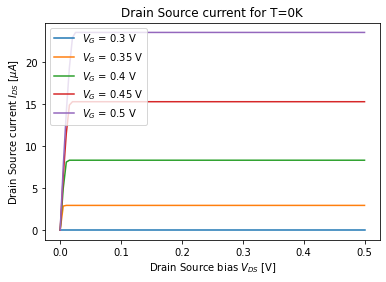

In [ ]:
for V_G in V_G_array:
  I=Current_vec(V_DS_array)
  plt.plot(V_DS_array,I/(1e-6),label='$V_G$ = {:} V'.format(V_G))
plt.legend()
plt.xlabel('Drain Source bias $V_{DS}$ [V]')
plt.ylabel('Drain Source current $I_{DS}$ [$\mu A$]')
plt.title('Drain Source current for T=0K');
plt.savefig('Analitica_T0K.png', dpi=300)

Parte (d)

In [ ]:
V_T=((E_C-mu_s)/(eta_0*e))
print((V_T-V_T*0.7)*(eta_0*e)/eV)

0.08999999999999997


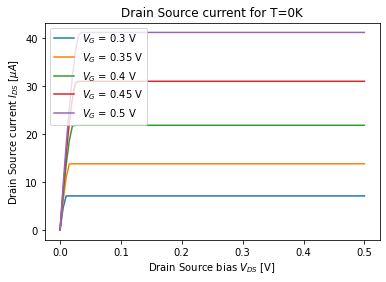

In [ ]:
for V_G in V_G_array:
  I=Current_vec(V_DS_array)
  plt.plot(V_DS_array,I/(1e-6),label='$V_G$ = {:} V'.format(V_G))
plt.legend()
plt.xlabel('Drain Source bias $V_{DS}$ [V]')
plt.ylabel('Drain Source current $I_{DS}$ [$\mu A$]')
plt.title('Drain Source current for T=298K');

In [ ]:
V_T=(1.019*E_C-mu_s)/(eta_0*e)

In [ ]:
(0.019*E_C)/eV

-0.0893

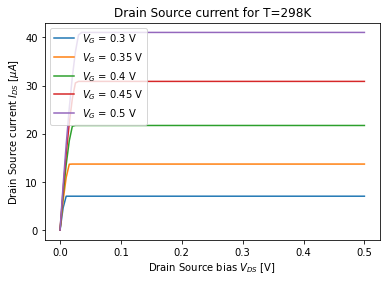

In [ ]:
for V_G in V_G_array:
  I=Current_vec(V_DS_array)
  plt.plot(V_DS_array,I/(1e-6),label='$V_G$ = {:} V'.format(V_G))
plt.legend()
plt.xlabel('Drain Source bias $V_{DS}$ [V]')
plt.ylabel('Drain Source current $I_{DS}$ [$\mu A$]')
plt.title('Drain Source current for T=298K');
plt.savefig('Analitica_T298K.png', dpi=300)